# Q.71-80


In [2]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

## Q. 71. マスキング
特定の色域を黒く塗るだけなのでzerosをnp.boolで作って色域に該当する画素を0にする

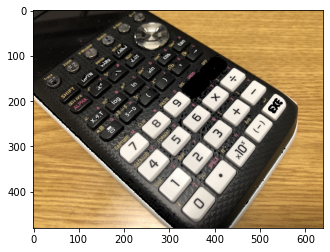

In [3]:
import numpy as np
cimg = cv2.imread('Calc.jpg').astype(np.float32)/255.0
hsvimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
himg = hsvimg[:,:,0]
hmask = np.zeros(himg.shape, dtype=np.bool)
hmask[(himg<=260)&(himg>=180)] = 1
cimg[hmask]  = 0
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))

## Q. 72. マスキング+ morphological processing


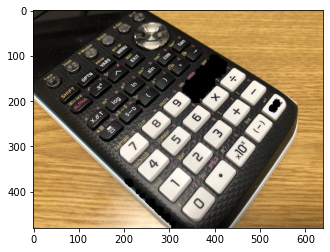

In [4]:
import numpy as np
cimg = cv2.imread('Calc.jpg').astype(np.float32)/255.0
hsvimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
himg = hsvimg[:,:,0]
hmask = np.zeros(himg.shape, dtype=np.uint8)
hmask[(himg<=260)&(himg>=180)] = 255
SE = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
hmask = cv2.morphologyEx(hmask, cv2.MORPH_CLOSE, SE, iterations=3)
hmask = cv2.morphologyEx(hmask, cv2.MORPH_OPEN, SE, iterations=4)
hmask_inv = cv2.bitwise_not(hmask)
dst = cv2.bitwise_and(cimg, cimg, mask=hmask_inv)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q. 73. 拡大と縮小


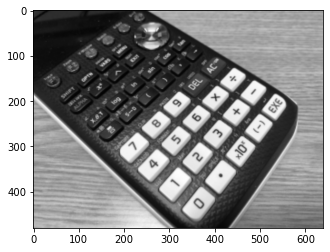

In [5]:
import numpy as np
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
height, width = gimg.shape
dst = cv2.resize(gimg, (np.int(width/2), np.int(height/2)), interpolation = cv2.INTER_LINEAR)
dst = cv2.resize(dst, (width, height), interpolation = cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q. 74. ピラミッド差分
高周波成分の抽出ということなので，ガウシアンピラミッドpyrUp, pyrDownの方でやる。
差分がわかるよう2段下げてから戻した差分に128を足して，グレーを0レベルにしている。

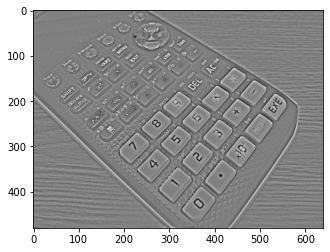

In [8]:
import numpy as np
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
gimg2 = cv2.pyrDown(gimg)
dst = cv2.pyrDown(gimg2)
dst = cv2.pyrUp(dst)
dst = cv2.pyrUp(dst)
dst2 = gimg - dst + 128
plt.imshow(dst2, cmap='gray')

## Q. 75. ガウシアンピラミッド
名前の通りガウシアンフィルタを畳み込んでから画像を縦横1/2にする。ガウシアンフィルタが必要な理由はリサンプリングによるエイリアシングの発生を抑えるためで，LPFのガウシアンフィルタによって高周波域を落としてから縮小する。

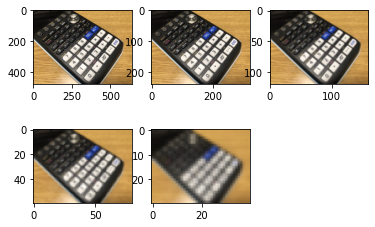

In [11]:
cimg = cv2.imread('Calc.jpg')
img2 = cv2.pyrDown(cimg)
img3 = cv2.pyrDown(img2)
img4 = cv2.pyrDown(img3)
img5 = cv2.pyrDown(img4)
plt.subplot(2,3,1)
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,4)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.subplot(2,3,5)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))

## Q. 76. 顕著性マップ
問いの話はStaticSaliencyFineGrainedに若干近いのでそっちを使う。ちなみに目を検出できるわけではない。

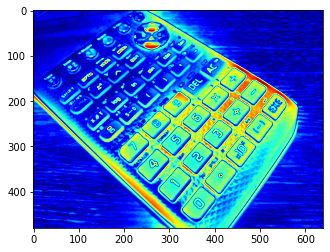

In [15]:
cimg = cv2.imread('Calc.jpg')
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
ret, smap = saliency.computeSaliency(cimg)
plt.imshow(smap, cmap='jet')

## Q. 77. Gabor Filter
OpenCVにはgetGaborKernelがある。
角度関係はラジアンなので注意

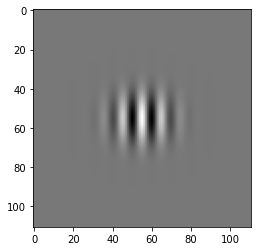

In [16]:
kernel = cv2.getGaborKernel(ksize = (111, 111), sigma = 10, theta = 0, lambd = 10, gamma = 1.2, psi = 0)
plt.imshow(kernel, cmap = 'gray')

## Q. 78. Gabor filterの回転
カッコつけてリスト内包表記を使ってみる。そのあとでhconcatで横に並べている(高さが一緒なら使える関数)

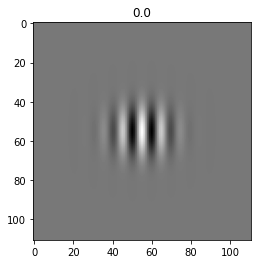

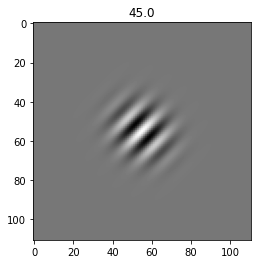

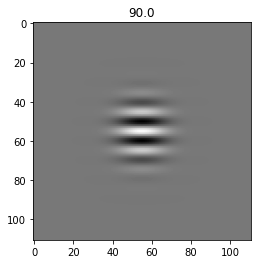

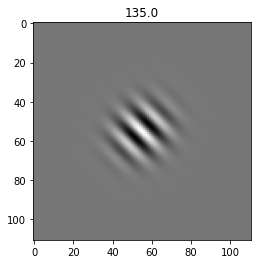

In [23]:
import numpy as np
thsdeg = np.array([0.0, 45.0, 90.0, 135.0])
ths = np.pi * thsdeg / 180.0
ks = [cv2.getGaborKernel(ksize = (111, 111), sigma = 10, theta = th, lambd = 10, gamma = 1.2, psi = 0)  for th in ths]
for i, k in enumerate(ks):
    plt.figure()
    plt.imshow(k, cmap = 'gray')
    plt.title(thsdeg[i])


## Q. 79. Gabor Filterによる特定成分の抽出
Gabor Filterは特定方向の特定周波数(位相)の検出フィルタとなる。前問で作成した個々の向きの成分を抽出している

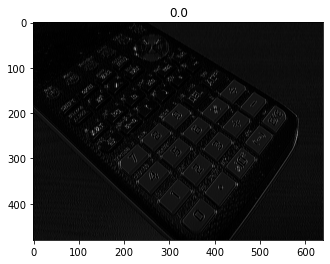

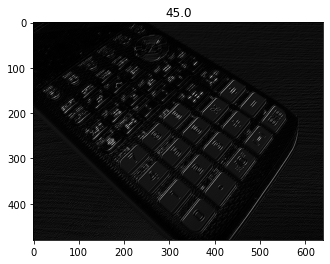

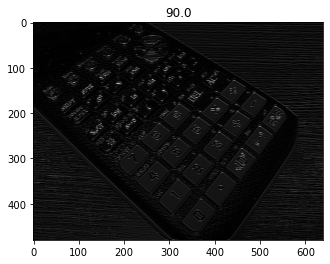

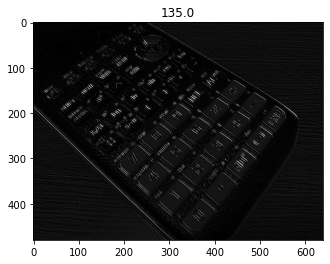

In [22]:
import numpy as np
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
thsdeg = np.array([0.0, 45.0, 90.0, 135.0])
ths = np.pi * thsdeg / 180.0
ks = [cv2.getGaborKernel(ksize = (11, 111), sigma = 1.5, theta = th, lambd = 3, gamma = 1.2, psi = 0)  for th in ths]
dsts = [cv2.filter2D(gimg, -1, kernel) for kernel in ks]
for i,im in enumerate(dsts):
    plt.figure()
    plt.imshow(im, cmap = 'gray')
    plt.title(thsdeg[i])


## Q. 80. Gabor Filterの結果の合成 (前問からの続き)
8近傍でとりうる4方向の周波数成分を抽出しているので，加算すれば全方向の抽出，すなわち設計にもよるが，特定周波数の全方向のエッジ抽出の結果と言える。

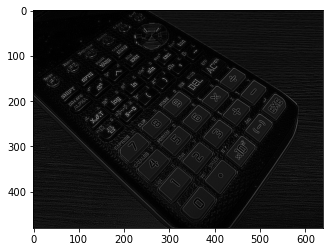

In [24]:
dst2 = np.zeros(gimg.shape)
for i in range(4):
    dst2 += dsts[i]
plt.imshow(dst2, cmap = 'gray')
